In [56]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

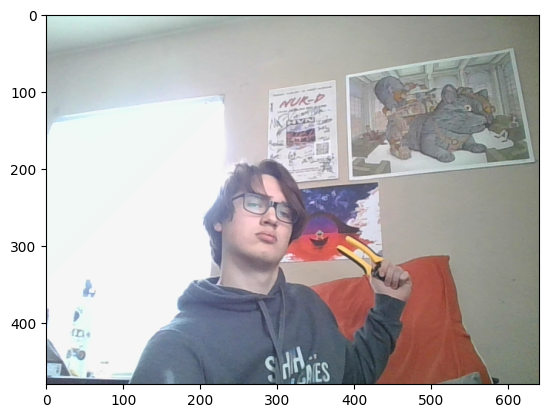

In [57]:
# take a photo with opencv using the webcam
file_path = 'test.png'
cap = cv2.VideoCapture(0)
image = cap.read()[1]

# check if test.png exists
import os
if os.path.exists(file_path):
    # if it does, delete it
    os.remove(file_path)

# save the image to a file
cv2.imwrite('test.png', image)

# show the image using matplotlib
# convert the image from BGR to RGB

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

cv2.destroyAllWindows()
cap.release()

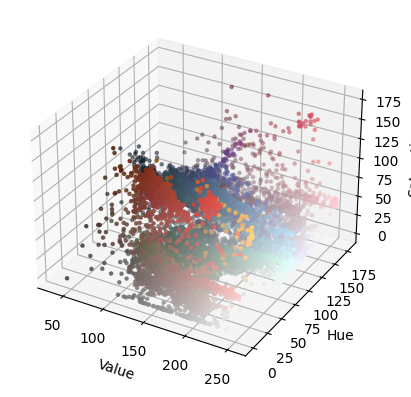

In [58]:
# have matplotlib display outside of the notebook
# %matplotlib tk
# use the matplotlib function to display a 3d plot of the image's colors

image = cv2.imread('test.png')
# reduce the image's size to 1/4 of its original size
image = cv2.resize(image, (0,0), fx=0.25, fy=0.25)
# convert to hsv color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 3d plot of the image's colors in hsv color space with each point colored by its hsv value converted to rgb
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv = hsv.reshape((hsv.shape[0] * hsv.shape[1], 3))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3))
norm = plt.Normalize(0,255)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
ax.scatter(hsv[:,2], hsv[:,0], hsv[:,1], facecolors=pixel_colors, marker=".")
ax.set_xlabel("Value")
ax.set_ylabel("Hue")
ax.set_zlabel("Saturation")
plt.show()

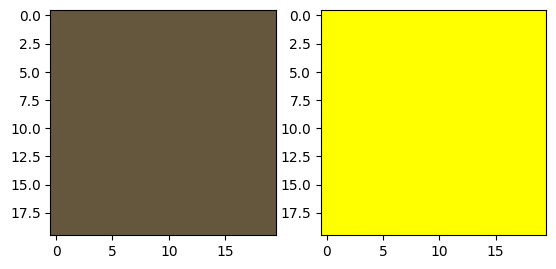

In [59]:
# make matplotlib display inside the notebook
# %matplotlib inline

# create a mask to filter yellow form the image
lower_yellow = np.array([20, 100, 100])
rgb_lower_yellow = cv2.cvtColor(np.uint8([[lower_yellow]]), cv2.COLOR_HSV2BGR)[0][0]
upper_yellow = np.array([30, 255, 255])
rgb_upper_yellow = cv2.cvtColor(np.uint8([[upper_yellow]]), cv2.COLOR_HSV2BGR)[0][0]

# create an empty 20x20 image
low_yellow_img = np.zeros((20, 20, 3), np.uint8)
high_yellow_img = np.zeros((20, 20, 3), np.uint8)
# color the image yellow
low_yellow_img[:] = rgb_lower_yellow
high_yellow_img[:] = rgb_upper_yellow

# show the images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(low_yellow_img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(high_yellow_img, cv2.COLOR_BGR2RGB))


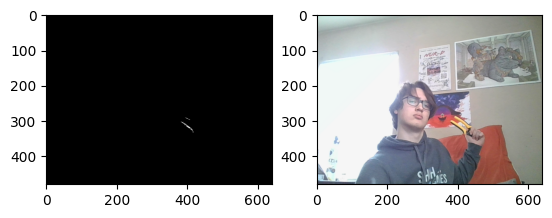

In [60]:
# create a mask to filter yellow from the image
# %matplotlib inline
image = cv2.imread('test.png')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_yellow = (20, 100, 100)
upper_yellow = (30, 255, 255)
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# show the mask using matplotlib
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


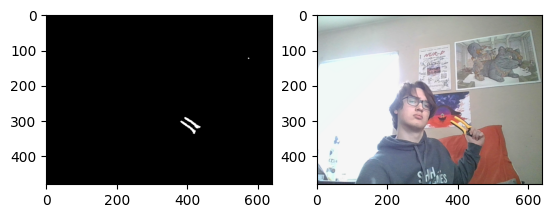

In [63]:
# get the average color of the masked area
# %matplotlib inline
image = cv2.imread('test.png')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_yellow = (20, 100, 100)
upper_yellow = (30, 255, 255)
middle_yellow = (25, 200, 200)

def ellipse_inRange(image, color, radius, color0_factor = 1, color1_factor = 1, color2_factor = 1):
    color_factor = np.array([1/color0_factor, 1/color1_factor, 1/color2_factor])
    mask = np.sqrt(np.sum(np.square(np.multiply(image - color, color_factor)), axis=2)) < radius
    return mask.astype(np.uint8) * 255

def distance(c1, c2):
    return np.sqrt((c2[0] - c1[0])**2 + (c2[1] - c1[1])**2 + (c2[2] - c1[2])**2)

# create an empty image that is the same size as the original image
r, f0, f1, f2 = 50, 0.25, 3, 3
mask = ellipse_inRange(hsv, middle_yellow, r, f0, f1, f2)


# show the new mask
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [62]:
# use the new inRange function in the below cv2 loop

cap = cv2.VideoCapture(0)

while True:
    ret, image = cap.read()
    if not ret:
        break
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = ellipse_inRange(hsv, middle_yellow, r, f0, f1, f2)
    kernel = np.ones((2,2))
    mask = cv2.erode(mask, kernel, iterations=1)
    kernel = np.ones((5, 5))
    mask = cv2.dilate(mask, kernel, iterations=2)
    
    cv2.imshow('image', image)
    cv2.imshow('mask', cv2.bitwise_and(image, image, mask=mask))
    
    # press q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()